In [1]:
# https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
# https://www.cdc.gov/nchs/data/databriefs/db427-tables.pdf#4 - 5% 
# https://www.heartandstroke.ca/stroke/what-is-stroke
# https://www.healthline.com/health/stroke-vs-heart-attack

In [2]:
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, f1_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [7]:
df.dropna(axis=0, inplace=True)

In [8]:
df.stroke.value_counts()

0    4700
1     209
Name: stroke, dtype: int64

In [9]:
# drop the row with "other" in gender as it is only one row
df = df[df.gender != 'Other']
df.gender.value_counts()

Female    2897
Male      2011
Name: gender, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4908 non-null   int64  
 1   gender             4908 non-null   object 
 2   age                4908 non-null   float64
 3   hypertension       4908 non-null   int64  
 4   heart_disease      4908 non-null   int64  
 5   ever_married       4908 non-null   object 
 6   work_type          4908 non-null   object 
 7   Residence_type     4908 non-null   object 
 8   avg_glucose_level  4908 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     4908 non-null   object 
 11  stroke             4908 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.5+ KB


In [11]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [12]:
df.reset_index(drop=True, inplace=True)

In [13]:
df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4908 non-null   int64  
 1   age                             4908 non-null   float64
 2   hypertension                    4908 non-null   int64  
 3   heart_disease                   4908 non-null   int64  
 4   avg_glucose_level               4908 non-null   float64
 5   bmi                             4908 non-null   float64
 6   stroke                          4908 non-null   int64  
 7   gender_Male                     4908 non-null   uint8  
 8   ever_married_Yes                4908 non-null   uint8  
 9   work_type_Never_worked          4908 non-null   uint8  
 10  work_type_Private               4908 non-null   uint8  
 11  work_type_Self-employed         4908 non-null   uint8  
 12  work_type_children              49

In [14]:
X = df.drop(columns=['stroke'], axis=1)
y = df.stroke

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## Logistic Regression with SMOTE

In [15]:
import imblearn.over_sampling

n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
ratio = {1 : n_pos * 4, 0 : n_neg} 

smote = imblearn.over_sampling.SMOTE(sampling_strategy=ratio, random_state = 42)
    
X_tr_smote, y_tr_smote = smote.fit_resample(X_train, y_train)

lr_smote = LogisticRegression(solver='liblinear') 
lr_smote.fit(X_tr_smote, y_tr_smote)

LogisticRegression(solver='liblinear')

In [16]:
train_score = lr_smote.score(X_tr_smote, y_tr_smote)
test_score = lr_smote.score(X_test, y_test)

print("The score for logistic regression is ")
print("Train set: {:6.2f}%".format(100*train_score))
print("Test set: {:6.2f}%".format(100*test_score))

The score for logistic regression is 
Train set:  84.98%
Test set:  91.14%


In [17]:
y_pred = lr_smote.predict(X_test)

print("Logistic Regression - ")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")

Logistic Regression - 
Precision: 0.19642857142857142
Recall: 0.20754716981132076
F1: 0.2018348623853211


In [18]:
def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    stroke_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(stroke_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['no_stroke', 'stroke'],
           yticklabels=['no_stroke', 'stroke']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

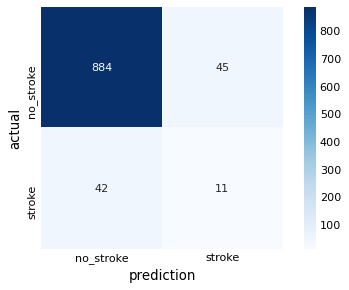

In [19]:
make_confusion_matrix(lr_smote)

In [20]:
# Let's see how our confusion matrix changes with changes to the cutoff! 

from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(lr_smote, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

In [27]:
# using the new threshold of 0.06
y_predict = (lr_smote.predict_proba(X_test)[:,1] > 0.06)
print("Threshold of 0.06:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Threshold of 0.06:
Precision: 0.0777,   Recall: 0.9057


In [25]:
# using the new threshold of 0.08
y_predict = (lr_smote.predict_proba(X_test)[:,1] > 0.08)
print("Threshold of 0.08:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Threshold of 0.08:
Precision: 0.0809,   Recall: 0.7925


In [26]:
# using the new threshold of 0.1
y_predict = (lr_smote.predict_proba(X_test)[:,1] > 0.1)
print("Threshold of 0.1:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Threshold of 0.1:
Precision: 0.0884,   Recall: 0.7170
